In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [19]:
flows = pd.read_csv("../data/inflows of foreign population by nationality.csv", low_memory=False)

flows = flows.dropna(subset=['Value'])
flows_cleaned = flows.dropna(subset=['Value'])

# dropping columns that we don't need
flows_cleaned = flows.drop(columns=['Flag Codes', 'Flags'])

In [20]:
inflows_cleaned = flows_cleaned[flows_cleaned['Variable'] == 'Inflows of foreign population by nationality']
inflows_cleaned = inflows_cleaned[inflows_cleaned['Country of birth/nationality'] != "Total"]

In [26]:
df = inflows_cleaned[['Country of birth/nationality', 'Country', 'Year', 'Value']]

In [28]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year
df.head()

/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_15384/173303274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_15384/173303274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].dt.year


,Country of birth/nationality,Country,Year,Value
0,Afghanistan,Australia,2000,887.0
1,Afghanistan,Australia,2001,456.0
2,Afghanistan,Australia,2002,660.0
3,Afghanistan,Australia,2003,1015.0
4,Afghanistan,Australia,2004,1340.0


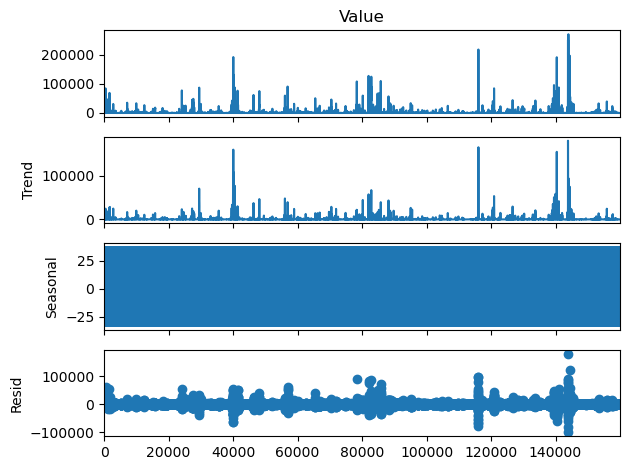

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.39077D+00    |proj g|=  6.03277D-02

At iterate    5    f=  9.36165D+00    |proj g|=  1.62169D-02

At iterate   10    f=  9.35375D+00    |proj g|=  2.96456D-03

At iterate   15    f=  9.35160D+00    |proj g|=  7.25915D-03

At iterate   20    f=  9.34689D+00    |proj g|=  6.04411D-03

At iterate   25    f=  9.34471D+00    |proj g|=  8.44653D-04

At iterate   30    f=  9.34300D+00    |proj g|=  3.10809D-03

At iterate   35    f=  9.34290D+00    |proj g|=  2.66377D-03

At iterate   40    f=  9.34290D+00    |proj g|=  6.69712D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_in

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Train-test split
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Explore the data
result = seasonal_decompose(train_data['Value'], model='additive', period=12)
result.plot()
plt.show()

# Train the SARIMA model
model = SARIMAX(train_data['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Evaluate the model
predictions = results.get_forecast(len(test_data)).predicted_mean
mae = mean_absolute_error(test_data['Value'], predictions)
rmse = mean_squared_error(test_data['Value'], predictions, squared=False)

# Make predictions for future
future_predictions = results.get_forecast(steps=12).predicted_mean

/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_15384/3866519975.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_data.index[-1], periods=12, freq='M')


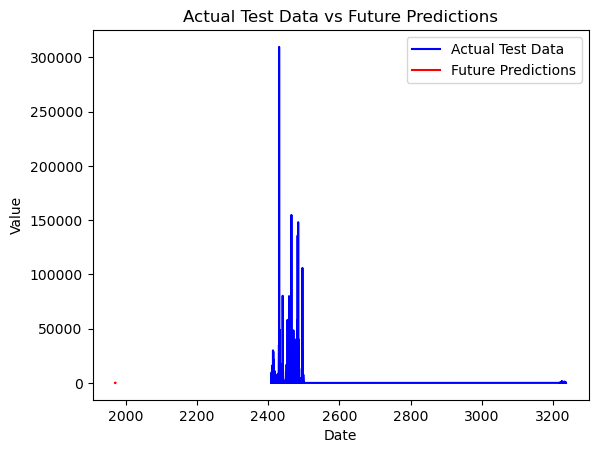

In [17]:
# Generate future dates for plotting
future_dates = pd.date_range(start=test_data.index[-1], periods=12, freq='M')

# Plot actual test data
plt.plot(test_data.index, test_data['Value'], label='Actual Test Data', color='blue')

# Plot future predictions with extended dates
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual Test Data vs Future Predictions')

# Add legend
plt.legend()

# Show plot
plt.show()